In [1]:
import warnings
warnings.filterwarnings('ignore')

#Import "classic" libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data sets for assignment

Q1_Dry_Bean = pd.read_excel('Q1_Dry_Bean_Dataset.xlsx')
Q2_OnlineNews = pd.read_csv('Q2_OnlineNewsPopularity.csv')
Q3_AirPassengers = pd.read_csv('Q3_AirPassengers.csv')
Q4_Online_Retail = pd.read_excel('Q4_Online Retail.xlsx')

# Question 1

In [3]:
Q1_Dry_Bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
Q1_Dry_Bean.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

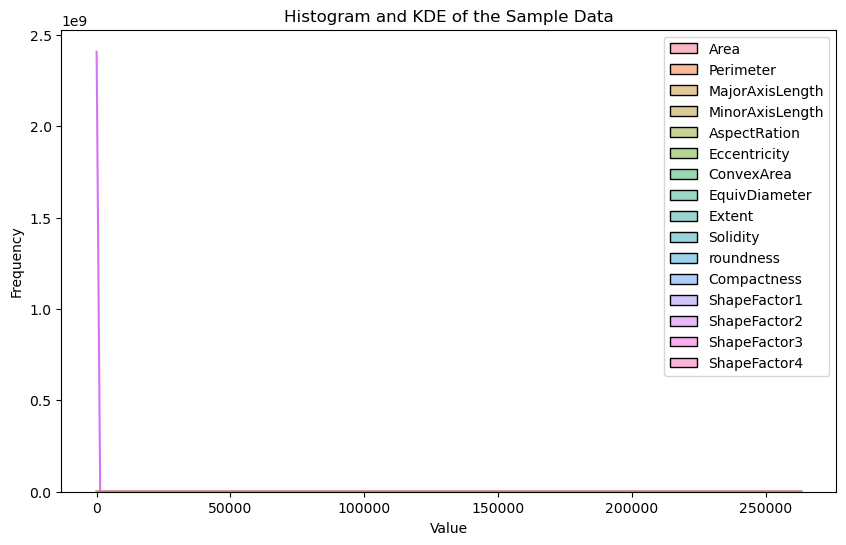

In [5]:
# Plot histogram and KDE

plt.figure(figsize=(10, 6))
sns.histplot(Q1_Dry_Bean, kde=True, bins=30)
plt.title('Histogram and KDE of the Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='ShapeFactor3'>

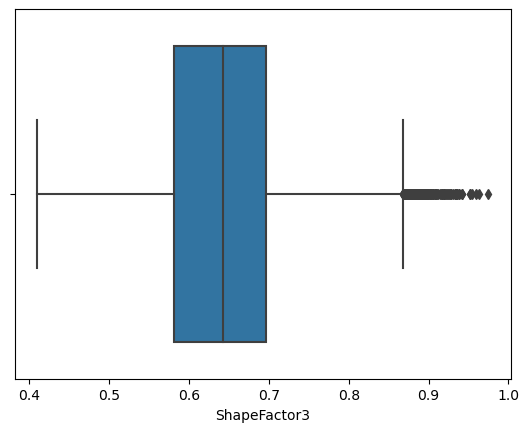

In [6]:
#Use visualization to identify outliers

sns.boxplot(x = 'ShapeFactor3', data = Q1_Dry_Bean)

In [7]:
#We define the X

X = Q1_Dry_Bean.iloc[:,:-5].values

In [8]:
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        9.88855999e-01, 9.58027126e-01, 9.13357755e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        9.84985603e-01, 8.87033637e-01, 9.53860842e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        9.89558774e-01, 9.47849473e-01, 9.08774239e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        9.89898753e-01, 9.18424091e-01, 8.22729703e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        9.87812595e-01, 9.07906457e-01, 8.17457451e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        9.89647887e-01, 8.88380369e-01, 7.84997193e-01]])

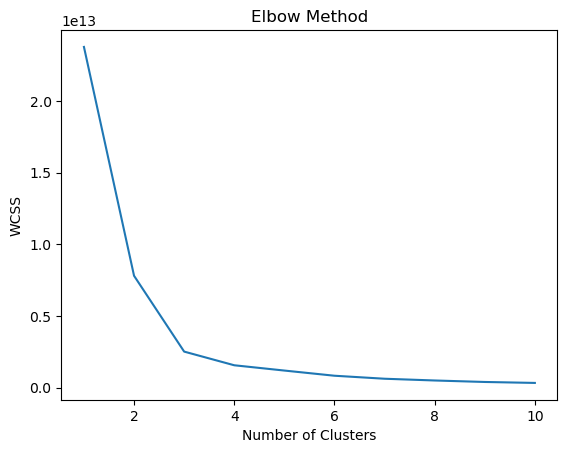

In [9]:
#We conduct the Elbow Method to select the best number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#We create our y

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state =  0)
y = kmeans.fit_predict(X)

In [11]:
#Append the y into the dataset

Q1_Dry_Bean['y'] = y

In [12]:
Q1_Dry_Bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,y
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,0


In [13]:
Q1_Dry_Bean.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
y                    int32
dtype: object

In [14]:
#ML libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
#We define X and Y

x = Q1_Dry_Bean.iloc[:,:-5].values
y = Q1_Dry_Bean.iloc[:, -1].values

In [16]:
#Splitting into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
#We initialise the classifiers

classifiers = {
    'SVM Classifier': SVC(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'KNN Classifier': KNeighborsClassifier(),
    'Naive Bayes Classsifier': GaussianNB()
}

In [19]:
#We train and evaluate the models

results = {}
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
#Print the results

for name, accuracy in results.items():
    print(f"{name}: {accuracy: .2f}")

SVM Classifier:  0.99
Random Forest Classifier:  1.00
Decision Tree Classifier:  1.00
KNN Classifier:  0.98
Naive Bayes Classsifier:  0.97


In [20]:
#We conduct Cross validation with decision tree to see if there is over fitting

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [21]:
#Initialize the Decision Tree Regressor

tree_reg = DecisionTreeRegressor(random_state = 0)

In [22]:
#Perform 10-fold cross-validation

scores = cross_val_score(tree_reg, x, y, cv = 10, scoring = 'neg_mean_squared_error')

In [23]:
#Calculate Root Mean Squared Error (RMSE) for each fold

rmse_scores = np.sqrt(-scores)

In [24]:
#Print the results

print("Scores:", rmse_scores)
print('Mean:',rmse_scores.mean())
print("Standard Deviation:", rmse_scores.std())

Scores: [0.         0.         0.61811973 0.         0.19546662 0.
 0.         0.05421269 0.         0.        ]
Mean: 0.08677990439343142
Standard Deviation: 0.1865236456405284


KNN Classifier:

In [25]:
Q1_Dry_Bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,y
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,0


In [26]:
#We define the data into X and y

X = Q1_Dry_Bean.iloc[:, :-6].values
y = Q1_Dry_Bean.iloc[:, -1].values

In [27]:
#We split the data into training and testing set *Classifacation Model*

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
#Prepare and train the KNN model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9662062885689098


# Question 2

Random Forrest

In [31]:
Q2_OnlineNews

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [32]:
Q2_OnlineNews.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [33]:
Q2_OnlineNews.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [34]:
Q2_OnlineNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [35]:
print(Q2_OnlineNews.columns.tolist())

['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', '

In [36]:
#Removing leading spaces

Q2_OnlineNews.columns = Q2_OnlineNews.columns.str.strip()

In [37]:
#Dropping unnecessary columns

Q2_OnlineNews = Q2_OnlineNews.drop(['url', 'timedelta'], axis=1)


In [38]:
Q2_OnlineNews.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [39]:
#Define the variables (x and y)

X = Q2_OnlineNews.iloc[:, :-1].values
y = Q2_OnlineNews.iloc[:, -1].values

In [40]:
#We split the data into the training set and the test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [41]:
#We need to train the model

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [42]:
#Predicting the results

y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 1181.4   919. ]
 [ 2208.6  1600. ]
 [ 3078.9 11700. ]
 ...
 [ 3070.8 12700. ]
 [ 3840.4   651. ]
 [ 2251.8  2200. ]]


In [43]:
#Evaluating the performance of the model

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.338501233615101

Support Vector

In [44]:
Q2_OnlineNews.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [45]:
#Define the variables (x and y)

X1 = Q2_OnlineNews.iloc[:, :-1].values
y1 = Q2_OnlineNews.iloc[:, -1].values

In [46]:
#We need to reshape the variables becasue the length of "y" must match the length of "X"

y1 = y1.reshape(len(y1), 1)

In [47]:
#We split the data into the training set and the test set

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 0)

In [48]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X1_train = sc_X.fit_transform(X1_train)
y1_train = sc_y.fit_transform(y1_train)

In [49]:
#We start training the Support Vector Regression

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

In [50]:
#We predict the test results

y_pred = regressor.predict(sc_X.transform(X_test))
y_pred = y_pred.reshape(-1, 1) #Reshape y_pred to be a 2D array for inverse transform
y_pred = sc_y.inverse_transform(y_pred) #Now perform the inverse transform

In [51]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred, y_test.reshape(len(y_test), 1)), 1))

[[1.84e+07 9.19e+02]
 [1.84e+07 1.60e+03]
 [1.84e+07 1.17e+04]
 ...
 [1.84e+07 1.27e+04]
 [1.84e+07 6.51e+02]
 [1.84e+07 2.20e+03]]


In [52]:
#We evaluate the module performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-4428152.609850537

Cross-validation for Support Vector Regressor

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
sc_X_full = StandardScaler()
sc_y_full = StandardScaler()

In [55]:
X_scaled =  sc_X_full.fit_transform(X)
y_scaled = sc_y_full.fit_transform(y.ravel().reshape(-1, 1))

In [56]:
#We defind the Support Vector Regressor regressor

regressor_sv = SVR(kernel = 'rbf')

In [57]:
#We are ready to perform cross validation with 10 folds

scores = cross_val_score(regressor_sv, X_scaled, y_scaled.ravel(), scoring = 'neg_mean_squared_error', cv = 10)

In [58]:
#Calculate the Root Mean Squared Error (RMSE) for each fold

rmse_scores = np.sqrt(-scores)

In [59]:
#Print/display the results

print("RMSE:", rmse_scores)
print('Mean:',rmse_scores.mean())
print("Standard Deviation:", rmse_scores.std())

RMSE: [1.02 1.14 1.31 0.72 1.6  1.11 0.59 0.51 0.71 0.68]
Mean: 0.9393688698562845
Standard Deviation: 0.3350836713483715


# Question 3

# ARIMA MODEL

In [114]:
#Import "specific" libraries

import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [115]:
Q3_AirPassengers.reset_index(inplace=True)

In [116]:
Q3_AirPassengers.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [117]:
Q3_AirPassengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [118]:
Q3_AirPassengers.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [119]:
Q3_AirPassengers.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [76]:
#We convert the date into datetime format

Q3_AirPassengers['Month'] = pd.to_datetime(Q3_AirPassengers['Month'])

In [120]:
Q3_AirPassengers.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [79]:
#We set the date column as index to conduct the time series models

Q3_AirPassengers.set_index('Month', inplace = True)

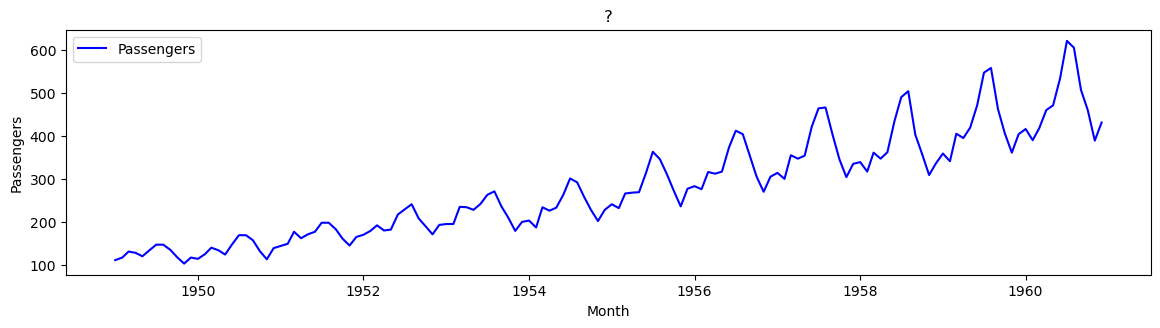

In [87]:
#Plotting the time series data to see the trends

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(Q3_AirPassengers, label='Passengers', color='blue')
plt.title('?')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()

In [82]:
#Ducky Fuller Test to check the stationarity/seasonality of the data

#H0: the data is not stationary
#H1: the data is stationary
#alpha = 0.05

result = adfuller(Q3_AirPassengers)
print('ADF statistics:', result[0])
print('p-value:', result[1])

ADF statistics: 0.8153688792060446
p-value: 0.9918802434376409


p-value is 0.99 which is greater then aplha which is 0.05

With this result we fail to reject the null hypothesis

The data is not stationary

In [121]:
#Split the data into training and test set

train_size = int(len(Q3_AirPassengers)*0.8)
train, test = Q3_AirPassengers.iloc[:train_size], Q3_AirPassengers.iloc[train_size:]

In [122]:
order_quantity = (1, 1, 1)  
model_quantity = ARIMA(train['#Passengers'], order=order_quantity)

In [92]:
#Training the model
results_quantity = model_quantity.fit()
results_quantity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -526.123
Date:                Sun, 11 Aug 2024   AIC                           1058.246
Time:                        17:58:08   BIC                           1066.454
Sample:                    01-01-1949   HQIC                          1061.577
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5111      0.114     -4.488      0.000      -0.734      -0.288
ma.L1          0.9144      0.056     16.251      0.000       0.804       1.025
sigma2       592.7851    101.208      5.857      0.000     394.422     791.148
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.76   Prob(JB):                         0.32
Heteroskedasticity (H):               5.22   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

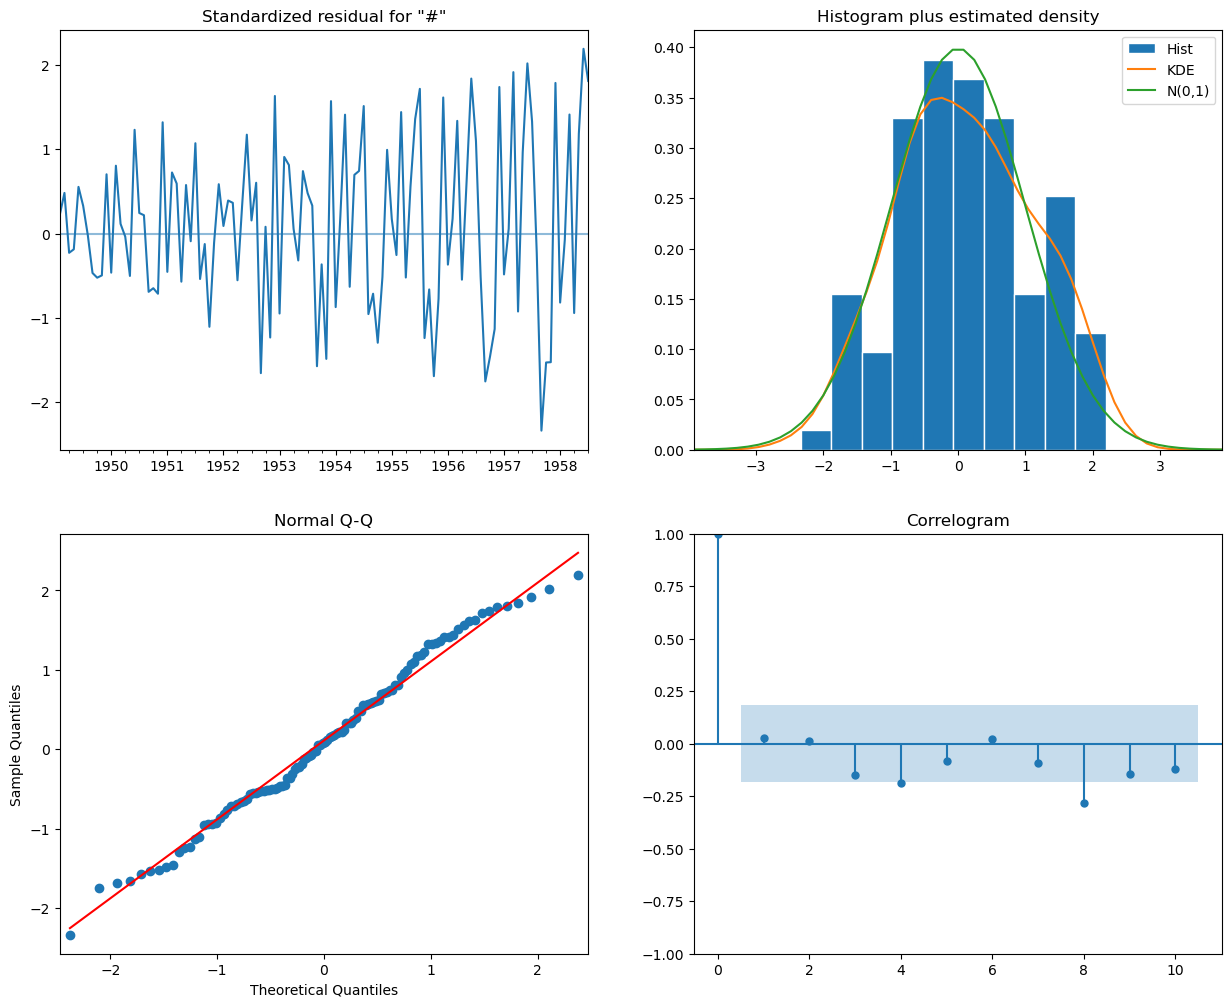

In [93]:
#Diagnostic

results_quantity.plot_diagnostics(figsize=(15, 12))
plt.show()

In [124]:
#Forecast for the next 10 steps

forecast_steps_quantity = 10
forecast_quantity = results_quantity.get_forecast(steps = forecast_steps_quantity)
forecast_ci_quantity = forecast_quantity.conf_int()

In [125]:
#Results in a table

forecast_df_quantity = pd.DataFrame({
    'Forecast': forecast_quantity.predicted_mean.round(), # Whole number as quantitative 
})
forecast_df_quantity

,Forecast
1958-08-01,503.0
1958-09-01,497.0
1958-10-01,500.0
1958-11-01,498.0
1958-12-01,499.0
1959-01-01,499.0
1959-02-01,499.0
1959-03-01,499.0
1959-04-01,499.0
1959-05-01,499.0


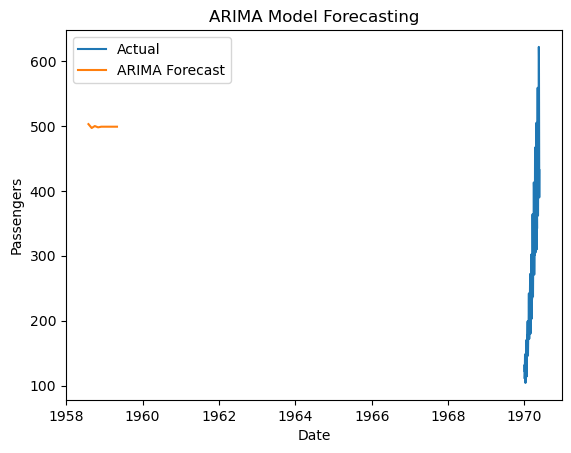

In [142]:
#Visualising forecasting

plt.plot(Q3_AirPassengers['#Passengers'], label="Actual")
plt.plot(forecast_df_quantity, label="ARIMA Forecast")
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# SARIMAX MODEL

In [127]:
#Fitting SARIMAX model on training data for 30 days (monthly)

order = (1, 1, 1) 
seasonal_order = (1, 1, 1, 30) 

In [128]:
model = SARIMAX(train['#Passengers'], order = order, seasonal_order = seasonal_order)
results = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60188D+00    |proj g|=  3.53913D-01

At iterate    5    f=  3.48448D+00    |proj g|=  3.10091D-02

At iterate   10    f=  3.46539D+00    |proj g|=  2.72142D-02

At iterate   15    f=  3.39780D+00    |proj g|=  2.21194D-03

At iterate   20    f=  3.39622D+00    |proj g|=  9.93153D-03

At iterate   25    f=  3.38354D+00    |proj g|=  2.80205D-02

At iterate   30    f=  3.37701D+00    |proj g|=  9.62683D-03

At iterate   35    f=  3.36903D+00    |proj g|=  2.28722D-02

At iterate   40    f=  3.36573D+00    |proj g|=  2.49196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [129]:
#Model summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                -387.059
Date:                            Mon, 12 Aug 2024   AIC                            784.118
Time:                                    17:22:42   BIC                            796.272
Sample:                                         0   HQIC                           789.003
                                            - 115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2497      0.409      0.610      0.542      -0.552       1.051
ma.L1          0.1070      0.410      0.261      0.794      -0.697       0.911
ar.S.L30      -0.7859      0.181     -4.347      0.000      -1.140      -0.432
ma.S.L30      -0.0502      0.364     -0.138      0.890      -0.764       0.664
sigma2       405.4718     77.689      5.219      0.000     253.204     557.740
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.99   Prob(JB):                         0.39
Heteroskedasticity (H):               3.55   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

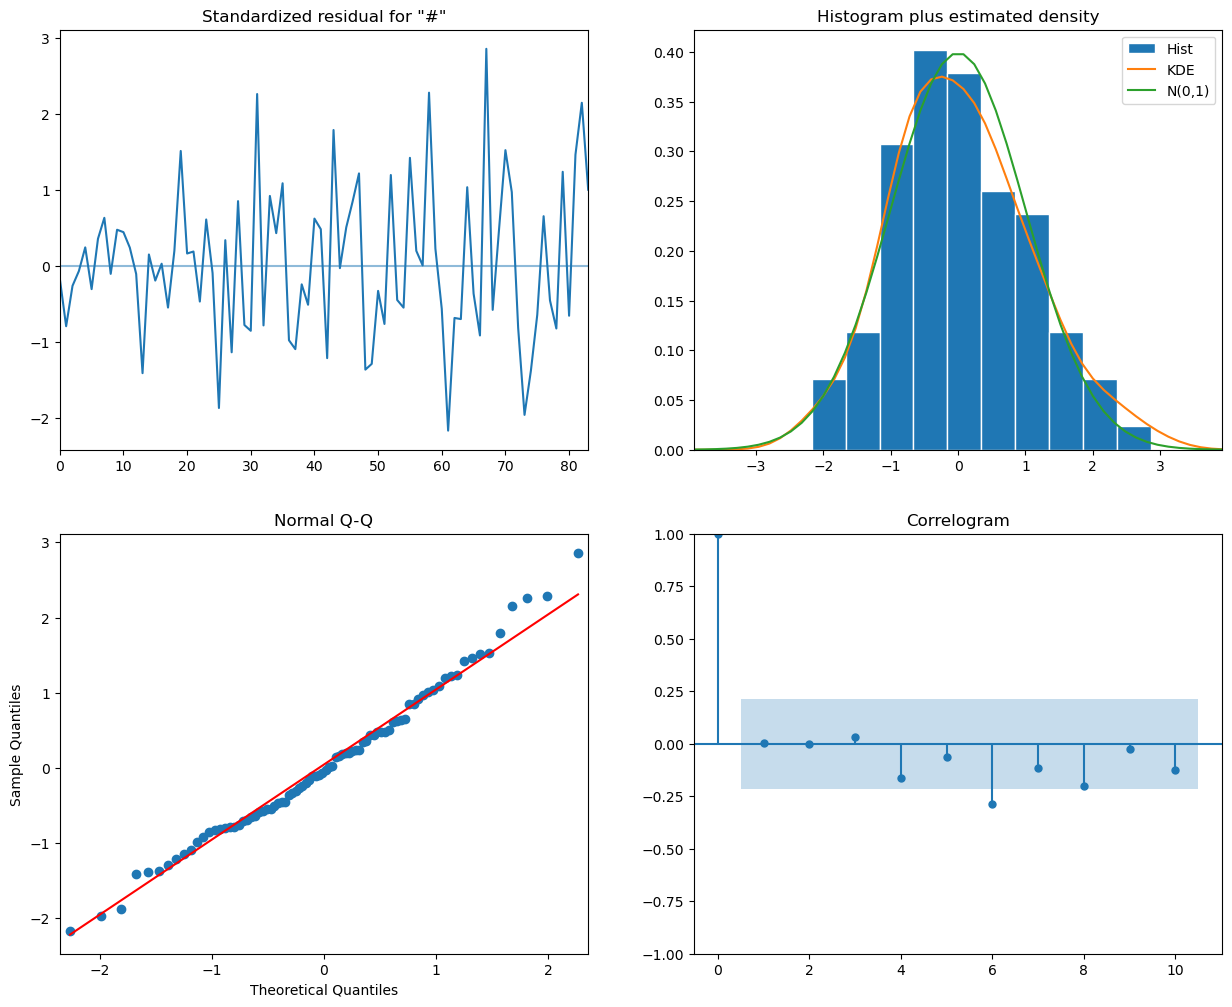

In [130]:
#Diagnostic

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [131]:
#Forecasting for the test period

forecast_steps = len(test)
forecast = results.get_forecast(steps = forecast_steps)
forecast_values = forecast.predicted_mean.round()
forecast_values.index = test.index

In [144]:
# Results of forecasting in table

forecast_df_quantity = pd.DataFrame({
    'Forecast': forecast.predicted_mean.round(),
})
print(forecast_df_quantity)

     Forecast
115     508.0
116     491.0
117     470.0
118     446.0
119     473.0
120     482.0
121     468.0
122     497.0
123     481.0
124     481.0
125     511.0
126     543.0
127     534.0
128     516.0
129     491.0
130     471.0
131     504.0
132     522.0
133     516.0
134     531.0
135     523.0
136     516.0
137     558.0
138     597.0
139     580.0
140     561.0
141     529.0
142     501.0
143     546.0


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [137]:
#Accuracy
mae = mean_absolute_error(test['#Passengers'], forecast_values).round()
mae

77.0

In [138]:
mse = mean_squared_error(test['#Passengers'], forecast_values).round()
mse

7591.0

In [139]:
rmse = np.sqrt(mse).round()
rmse

87.0

In [140]:
non_zero_test = test['#Passengers'] != 0
filtered_test = test['#Passengers'][non_zero_test]
filtered_forecast = forecast_values[non_zero_test]

mape = np.mean((np.abs((filtered_test - filtered_forecast) / filtered_test)) * 100).round()
mape

20.0

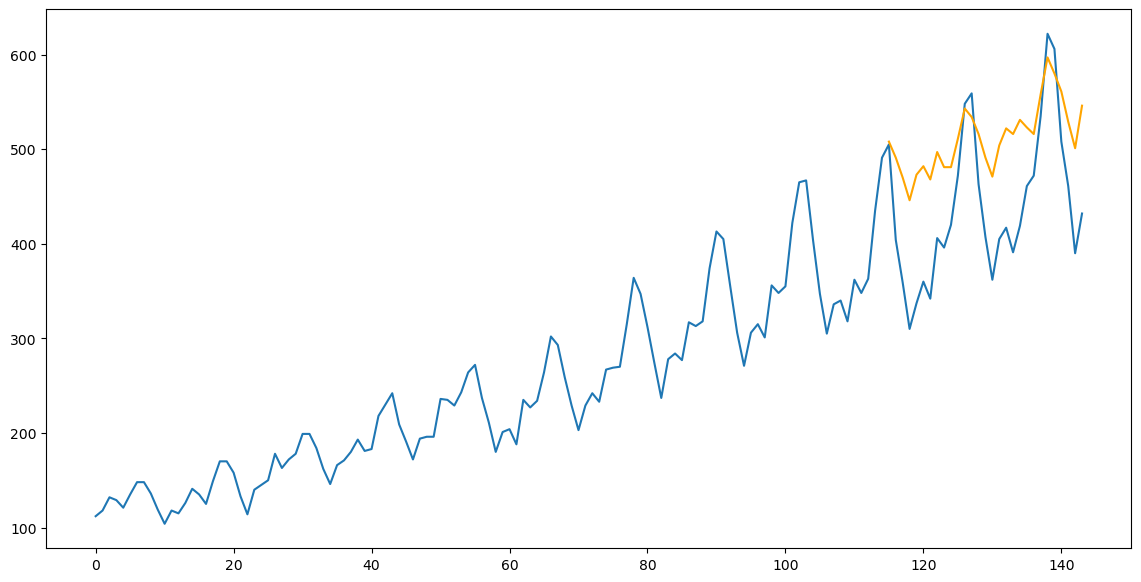

In [146]:
#Plotting the reslults

plt.figure(figsize = (14, 7))

#Observed values and forecast for the test set

plt.plot(Q3_AirPassengers.index, Q3_AirPassengers['#Passengers'], label = 'Observed')
plt.plot(forecast_values.index, forecast_values, label = 'Forecast Test Set', color = 'orange')


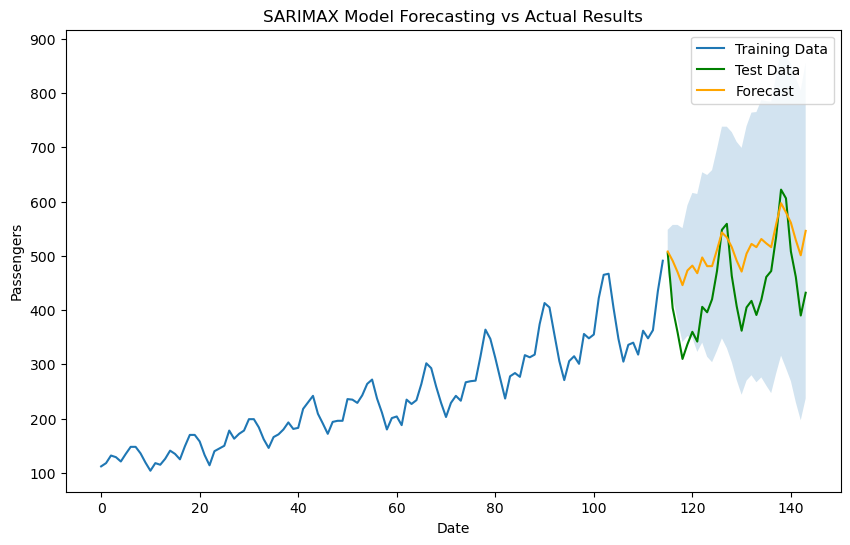

In [148]:
# Comparing actual model with the forecasting

plt.figure(figsize=(10, 6))

plt.plot(train.index, train['#Passengers'], label='Training Data')
plt.plot(test.index, test['#Passengers'], label='Test Data', color='green')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast.conf_int().index, 
                 forecast.conf_int().iloc[:, 0].round(), 
                 forecast.conf_int().iloc[:, 1].round(), alpha=0.2)
plt.title('SARIMAX Model Forecasting vs Actual Results')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()

# Question 4

In [150]:
Q4_Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [151]:
Q4_Online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [153]:
Q4_Online_Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [155]:
#We drop the rows where the customer ID is missing --> It makes noise in our future matrix construction

Q4_Online_Retail.dropna(subset=['CustomerID'], inplace = True)

In [156]:
#We can start with the recommendation system
#We convert the customer ID into string to facilitate the algroithm

Q4_Online_Retail['CustomerID'] = Q4_Online_Retail['CustomerID'].astype(str)

In [157]:
#We need to identify the values that are greater than 0 (a return will show up as a negative number)
#Apply to price and units

Q4_Online_Retail = Q4_Online_Retail[(Q4_Online_Retail['Quantity']>0) & (Q4_Online_Retail['UnitPrice']>0)]

In [158]:
#Now we will create the User_item matrix --> Understanding the behaviour of the user regarding the stock

user_item_matrix = Q4_Online_Retail.pivot_table(index = 'CustomerID', columns = 'StockCode', values = 'Quantity', aggfunc = 'sum').fillna(0)
user_item_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
#We create the similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)

In [161]:
#Display the similarities in a dataframe to make it easier to read

user_similarity_df = pd.DataFrame(user_similarity, index = user_item_matrix.index, columns = user_item_matrix.index)

In [162]:
user_similarity_df.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.028933,0.0,0.023478,0.506252,0.186107,...,0.0,0.001212,0.406837,0.0,0.015133,0.037236,0.0,0.010873,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001311,0.0,0.010634,0.286226,0.226244,...,0.0,0.032510,0.168665,0.0,0.000000,0.000000,0.0,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.131151,0.0,0.004931,0.000180,0.150819,...,0.0,0.148066,0.000000,0.0,0.015680,0.000000,0.0,0.013398,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001610,0.0,0.000000,0.000000,0.001179,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.019385,0.000000


In [163]:
#Rating prediction using the matrix user_item

def predict_ratings_user_based(user_item_matrix, user_similarity):
    mean_user_rating = user_item_matrix.mean(axis = 1).values
    rating_diff = (user_item_matrix.values - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + user_similarity.dot(rating_diff)/np.array([np.abs(user_similarity).sum(axis = 1)]).T
    return pred

In [164]:
#Predicted ratings

user_predicted_ratings = predict_ratings_user_based(user_item_matrix, user_similarity)
user_predicted_ratings

array([[ 1.82e+01,  1.82e+01,  1.82e+01, ...,  1.90e+01,  1.82e+01,
         1.84e+01],
       [ 6.23e-01,  2.17e-01,  1.23e-01, ...,  4.28e+00,  6.12e-02,
         2.26e+00],
       [ 2.65e-01,  1.67e-01,  1.37e-01, ...,  5.77e-01,  9.81e-02,
         1.22e+00],
       ...,
       [-2.80e-01, -2.25e-01, -3.93e-01, ...,  1.53e-01, -4.04e-01,
         5.22e-01],
       [ 6.63e-02, -1.63e-01, -1.82e-01, ...,  1.35e+00, -2.36e-01,
         1.14e+00],
       [ 1.67e-01,  1.91e-01,  1.03e-01, ...,  1.13e+00,  8.32e-03,
         9.42e-01]])

In [165]:
#Checking the performance of the algorithm

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

print('User-user collaborative error:', rmse(user_predicted_ratings, user_item_matrix.values))

User-user collaborative error: 162.29394996067475


In [166]:
#We create an item similarity matrix

item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index = user_item_matrix.columns, columns = user_item_matrix.columns)

In [167]:
#Rating for the item collaboration

def predict_ratings_item_based(user_item_matrix, item_similarity):
    pred = user_item_matrix.values.dot(item_similarity)/np.array([np.abs(item_similarity).sum(axis=1)])
    return pred

#Predict the ratings

item_predicted_ratings = predict_ratings_item_based(user_item_matrix, item_similarity)

#We print the accuracy
print('Item-item collaborative error:', rmse(item_predicted_ratings, user_item_matrix.values))

Item-item collaborative error: 137.3872015795063


In both cases, the errors seem very high. The rmse must be close to zero. The closer to zero, the better. So, we will apply the SVD.

In [168]:
from scipy.sparse.linalg import svds

In [169]:
#Normalise the data to have the same unit of measurement 

user_ratings_mean = np.mean(user_item_matrix.values, axis = 1)
ratings_demeaned = user_item_matrix.values - user_ratings_mean.reshape(-1, 1)

In [170]:
#Singular Value Decomposition (SVD)

U, sigma, Vt = svds(ratings_demeaned, k = 50)
sigma = np.diag(sigma)

In [171]:
#Rating prediction

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
predicted_ratings_df = pd.DataFrame(all_user_predicted_ratings, columns = user_item_matrix.columns)

In [172]:
#Evaluation of the model after SVD

print('SVD collaborative filtering', rmse(predicted_ratings_df.values, user_item_matrix.values))

SVD collaborative filtering 27.84694809325407


In [173]:
#Now, with these results, we can move on to the recommendations. Let's say that we want to recommend 3 items

def recommended_items(user_id, user_item_matrix, predicted_ratings_df, num_recommendations = 3):
    user_idx = user_item_matrix.index.get_loc(user_id) #sorting the user predicted ratings
    sorted_user_ratings = predicted_ratings_df.iloc[user_idx].sort_values(ascending = False)
    user_data = user_item_matrix.loc[user_id] #appending or merging the user data with the sorted ratings
    user_full = (user_data[user_data > 0]).sort_values(ascending = False)
    recommendations = sorted_user_ratings[~sorted_user_ratings.index.isin(user_full.index)]
    return recommendations.head(num_recommendations) #Recommendation of items that the user did not buy yet

In [174]:
def normalize_ratings(predicted_ratings):
    min_rating = predicted_ratings.min()
    max_rating = predicted_ratings.max()
    probabilities = (predicted_ratings - min_rating) / (max_rating - min_rating)
    return probabilities

# Customer #1

In [175]:
#To see the recommendations, we need to select a random user becasue recommendations will change usere by user

random_user_index = np.random.choice(user_item_matrix.index) #Select a random user

customer_id = random_user_index
customer_id

'13501.0'

In [180]:
recommendations = recommended_items(random_user_index, user_item_matrix, predicted_ratings_df, num_recommendations = 3)

In [181]:
#Normalise the predicted ratings to get probabilities
recommendation_probabilities = normalize_ratings(recommendations)

# Display the recommendations and their probabilities
print("Recommendations for customer ID:", customer_id)
print(recommendation_probabilities)

Recommendations for customer ID: 13501.0
StockCode
22470    1.000000
71477    0.093767
23288    0.000000
Name: 862, dtype: float64


In [182]:
print('Recommendations for customer:', customer_id)
print(recommendations)

Recommendations for customer: 13501.0
StockCode
22470    9.219993
71477    6.647180
23288    6.380975
Name: 862, dtype: float64


In [184]:
#We convert the stock codes into strings

Q4_Online_Retail['StockCode'] = Q4_Online_Retail['StockCode'].astype(str)

In [185]:
stock_codes = ['22470', '71477', '23288']

In [187]:
#We display the results in a dataframe

filtered_data = Q4_Online_Retail[Q4_Online_Retail['StockCode'].isin(['22470', '71477', '23288'])]
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
161,536384,22470,HEART OF WICKER LARGE,40,2010-12-01 09:53:00,2.55,18074.0,United Kingdom
632,536415,22470,HEART OF WICKER LARGE,1,2010-12-01 11:57:00,2.95,12838.0,United Kingdom
958,536520,22470,HEART OF WICKER LARGE,1,2010-12-01 12:43:00,2.95,14729.0,United Kingdom
1363,536538,22470,HEART OF WICKER LARGE,2,2010-12-01 13:54:00,2.95,14594.0,United Kingdom
2098,536557,22470,HEART OF WICKER LARGE,2,2010-12-01 14:41:00,2.95,17841.0,United Kingdom
...,...,...,...,...,...,...,...,...
535153,581191,22470,HEART OF WICKER LARGE,4,2011-12-07 16:56:00,2.95,17449.0,United Kingdom
537292,581246,22470,HEART OF WICKER LARGE,1,2011-12-08 10:59:00,2.95,15453.0,United Kingdom
538292,581404,22470,HEART OF WICKER LARGE,3,2011-12-08 13:47:00,2.95,13680.0,United Kingdom
539195,581438,71477,COLOURED GLASS STAR T-LIGHT HOLDER,12,2011-12-08 16:29:00,3.95,12955.0,United Kingdom


In [188]:
#We create a dataframe with the probability of buying the recommended items

prob_df = pd.DataFrame(list(recommendation_probabilities.items()), columns = ['StockCode', 'Probability']) #Creating the likelihood of buying the recommendations

In [189]:
prob_df["StockCode"] = prob_df["StockCode"].astype(str)

In [190]:
final_result_df = pd.merge(filtered_data[['StockCode', 'Description']].drop_duplicates(), prob_df, on = 'StockCode')
final_result_df

,StockCode,Description,Probability
0,22470,HEART OF WICKER LARGE,1.000000
1,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,0.093767
2,71477,COLOURED GLASS STAR T-LIGHT HOLDER,0.093767
3,23288,GREEN VINTAGE SPOT BEAKER,0.000000


# Customer #2

In [191]:
random_user_index = np.random.choice(user_item_matrix.index) #Select a random user

customer_id_2 = random_user_index
customer_id_2

'15750.0'

In [192]:
recommendations = recommended_items(random_user_index, user_item_matrix, predicted_ratings_df, num_recommendations = 3)

In [193]:
#Normalise the predicted ratings to get probabilities
recommendation_probabilities = normalize_ratings(recommendations)

# Display the recommendations and their probabilities
print("Recommendations for customer ID:", customer_id_2)
print(recommendation_probabilities)

Recommendations for customer ID: 15750.0
StockCode
22659    1.000000
21982    0.975293
84755    0.000000
Name: 2503, dtype: float64


In [195]:
#We convert the stock codes into strings

Q4_Online_Retail['StockCode'] = Q4_Online_Retail['StockCode'].astype(str)

In [196]:
stock_codes = ['22659', '21982', '84755']

In [197]:
#We display the results in a dataframe

filtered_data = Q4_Online_Retail[Q4_Online_Retail['StockCode'].isin(['22659', '21982', '84755'])]
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
36,536370,22659,LUNCH BOX I LOVE LONDON,24,2010-12-01 08:45:00,1.95,12583.0,France
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom
1263,536532,21982,PACK OF 12 SUKI TISSUES,48,2010-12-01 13:24:00,0.29,12433.0,Norway
2011,536551,22659,LUNCH BOX I LOVE LONDON,1,2010-12-01 14:34:00,1.95,17346.0,United Kingdom
2193,536569,22659,LUNCH BOX I LOVE LONDON,1,2010-12-01 15:35:00,1.95,16274.0,United Kingdom
...,...,...,...,...,...,...,...,...
538707,581412,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,8,2011-12-08 14:38:00,0.65,14415.0,United Kingdom
538973,581425,22659,LUNCH BOX I LOVE LONDON,1,2011-12-08 15:31:00,1.95,14796.0,United Kingdom
539013,581425,22659,LUNCH BOX I LOVE LONDON,2,2011-12-08 15:31:00,1.95,14796.0,United Kingdom
539878,581445,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2011-12-08 17:12:00,0.65,17405.0,United Kingdom


In [198]:
#We create a dataframe with the probability of buying the recommended items

prob_df = pd.DataFrame(list(recommendation_probabilities.items()), columns = ['StockCode', 'Probability']) #Creating the likelihood of buying the recommendations

In [199]:
prob_df["StockCode"] = prob_df["StockCode"].astype(str)

In [201]:
final_result_df = pd.merge(filtered_data[['StockCode', 'Description']].drop_duplicates(), prob_df, on = 'StockCode')
final_result_df

,StockCode,Description,Probability
0,22659,LUNCH BOX I LOVE LONDON,1.000000
1,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,0.000000
2,21982,PACK OF 12 SUKI TISSUES,0.975293


# Customer #3

In [202]:
random_user_index = np.random.choice(user_item_matrix.index) #Select a random user

customer_id_3 = random_user_index
customer_id_3

'14054.0'

In [203]:
recommendations = recommended_items(random_user_index, user_item_matrix, predicted_ratings_df, num_recommendations = 3)

In [204]:
#Normalise the predicted ratings to get probabilities
recommendation_probabilities = normalize_ratings(recommendations)

# Display the recommendations and their probabilities
print("Recommendations for customer ID:", customer_id_3)
print(recommendation_probabilities)

Recommendations for customer ID: 14054.0
StockCode
20725    1.000000
23203    0.471037
21931    0.000000
Name: 1260, dtype: float64


In [205]:
#We convert the stock codes into strings

Q4_Online_Retail['StockCode'] = Q4_Online_Retail['StockCode'].astype(str)

In [206]:
item_codes = ['20725', '23203', '21931']

In [209]:
#We display the results in a dataframe

filtered_data = Q4_Online_Retail[Q4_Online_Retail['StockCode'].isin(['20725', '23203', '21931'])]
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
93,536378,20725,LUNCH BAG RED RETROSPOT,10,2010-12-01 09:37:00,1.65,14688.0,United Kingdom
103,536378,21931,JUMBO STORAGE BAG SUKI,10,2010-12-01 09:37:00,1.95,14688.0,United Kingdom
368,536401,20725,LUNCH BAG RED RETROSPOT,1,2010-12-01 11:21:00,1.65,15862.0,United Kingdom
510,536409,21931,JUMBO STORAGE BAG SUKI,2,2010-12-01 11:45:00,1.95,17908.0,United Kingdom
614,536412,20725,LUNCH BAG RED RETROSPOT,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
539921,581450,20725,LUNCH BAG RED RETROSPOT,1,2011-12-08 17:54:00,1.65,16794.0,United Kingdom
540433,581486,23203,JUMBO BAG VINTAGE DOILY,20,2011-12-09 09:38:00,2.08,17001.0,United Kingdom
541696,581538,20725,LUNCH BAG RED RETROSPOT,1,2011-12-09 11:34:00,1.65,14446.0,United Kingdom
541811,581579,21931,JUMBO STORAGE BAG SUKI,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom


In [208]:
#We create a dataframe with the probability of buying the recommended items

prob_df = pd.DataFrame(list(recommendation_probabilities.items()), columns = ['StockCode', 'Probability']) #Creating the likelihood of buying the recommendations

In [210]:
prob_df["StockCode"] = prob_df["StockCode"].astype(str)

In [211]:
final_result_df = pd.merge(filtered_data[['StockCode', 'Description']].drop_duplicates(), prob_df, on = 'StockCode')
final_result_df

,StockCode,Description,Probability
0,20725,LUNCH BAG RED RETROSPOT,1.000000
1,20725,LUNCH BAG RED SPOTTY,1.000000
2,21931,JUMBO STORAGE BAG SUKI,0.000000
3,23203,JUMBO BAG DOILEY PATTERNS,0.471037
4,23203,JUMBO BAG VINTAGE DOILEY,0.471037
5,23203,JUMBO BAG VINTAGE DOILY,0.471037
